# Principal Component Analysis

(a small example)  
Inspired by [this link](http://cs231n.github.io/neural-networks-2/#datapre)

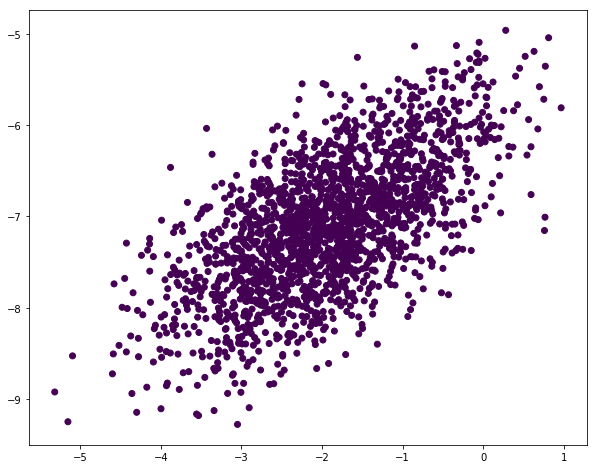

In [1]:
import matplotlib
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

# Display plots inline and change default figure size 
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
  
np.random.seed(10)

n_samples = 2000
n_features = 2
X, y = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=10, n_features=n_features, centers=1)

# Anisotropicly distributed data
transformation = np.random.random((n_features, n_features))
X_aniso = np.dot(X, transformation)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)

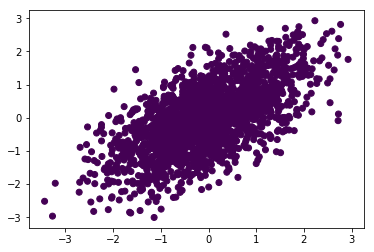

In [2]:
# Just normalize the data:

X_centered = X_aniso - X_aniso.mean(axis=0)
X_normalized = X_centered / X_centered.std(axis=0)

# Plot normalized data
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y)

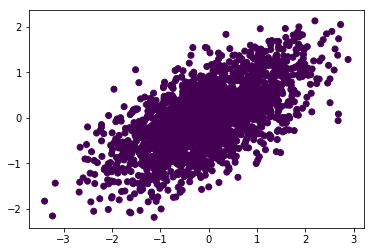

In [3]:
# Apply PCA: first, center the data

X_centered = X_aniso - X_aniso.mean(axis=0)

# Plot centered data
plt.scatter(X_centered[:, 0], X_centered[:, 1], c=y)

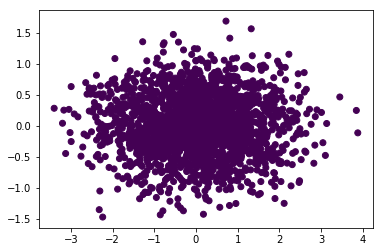

In [4]:
# Uncorrelate the data

covariance_matrix = np.dot(X_centered.T, X_centered) / X_centered.shape[0]
U, S, V = np.linalg.svd(covariance_matrix)
X_rotated = np.dot(X_centered, U)
# Notice: to reduce number of features:
# Xrotated_reduced = np.dot(X_rotated, U[:,:100])

# plot uncorrelated data
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], c=y)

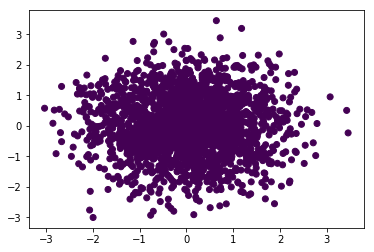

In [5]:
# whiten the data:
# divide by the eigenvalues (which are square roots of the singular values)
X_whitened = X_rotated / np.sqrt(S + 1e-5)

# plot whitened data
plt.scatter(X_whitened[:, 0], X_whitened[:, 1], c=y)

True

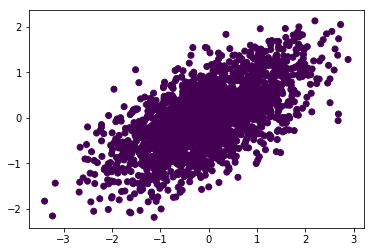

In [6]:
# Reconstruct the data

X_reconstructed = np.dot(X_whitened * np.sqrt(S + 1e-5), U.T)

plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c=y)

# True - X_reconstructed almost equal X_centered
np.allclose(X_reconstructed, X_centered)